# Constructing a convolutional neural network and applying it to the MNIST dataset

I will demonstrate how to construct a convolutional neural network. As an example, we will use the MNIST dataset to showcase how to train and evaluate the model.

## Introduction

[MNIST-blog-post]: https://ajg91.github.io/blog/2025/09/07/Convolutional_neural_network_with_mnist_dataset.html "MNIST-blog-post"

This notebook is meant as an introduction to how to build and train convolutional neural networks (CNNs). The goals of this project is to get comfortable with the CNN architecture, as well as develop good coding habits, such as using docstring and type hinting. It is also meant to showcase how to write modular code and a clean way of using parameters. By the end of this notebook, the person should understand how to build and train a convolutional neural network, how to write docstring, use type hinting, and the overall structure of developing a coding project.

For more information, as well as a walk-through of the results see [here][MNIST-blog-post] and subsequent posts.

## Objectives

- Build and train a convolutional neural network (CNN)
- Evaluate the prediction capabilities of a CNN
- Learn how to write docstrings
- Learn how to use type hinting
- Understand how to begin writing modular code

## Imports

In [1]:
import json
import torch as tc
import torch.nn as nn
import torch.optim as optim
from types import SimpleNamespace

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from datasets import get_dataloaders
from model import SimpleCNN
from train import train_model, evaluate_model, find_misclassified_images
from utils import set_seed, load_config
from plots import plot_images, plot_misclassified_images

## Parameters

In [3]:
dpi = 400
dataset = 'mnist'

config = load_config(path=f'../config_{dataset}.yaml')
cfg = SimpleNamespace(**config)
print(json.dumps(vars(cfg), indent=2))

set_seed(cfg.seed)
device = "cuda" if tc.cuda.is_available() else "cpu"

{
  "path": "../outputs/",
  "seed": 42,
  "split_size": 0.1,
  "batch_size": 64,
  "learning_rate": 0.001,
  "epochs": 3,
  "input_size": 1,
  "output_size": 10,
  "hidden_size": 128
}


## Initialize CNN

In [4]:
cnn = SimpleCNN(cfg.input_size, cfg.output_size, cfg.hidden_size).to(device)
optimizer = optim.AdamW(cnn.parameters(), lr=cfg.learning_rate)
loss_fn = nn.CrossEntropyLoss()

## Create dataloaders

In [5]:
train, val, test = get_dataloaders(dataset, cfg.split_size, cfg.batch_size, cfg.seed)

## Train and evaluate model

In [6]:
%%time

for e in range(cfg.epochs):
    train_acc = train_model(cnn, train, optimizer, loss_fn, device)
    val_acc = evaluate_model(cnn, val, device)
    print(f"Epoch {e + 1}, Train Accuracy: {train_acc:.8f}, Validation Accuracy: {val_acc:.8f}")

test_acc = evaluate_model(cnn, test, device)
print(f"Test Accuracy: {test_acc:.8f}")

Epoch 1, Train Accuracy: 0.88814815, Validation Accuracy: 0.94385714
Epoch 2, Train Accuracy: 0.95839506, Validation Accuracy: 0.96385714
Epoch 3, Train Accuracy: 0.97007055, Validation Accuracy: 0.96928571
Test Accuracy: 0.97190476
CPU times: user 2min 53s, sys: 33.4 s, total: 3min 26s
Wall time: 1min 24s


## Plots

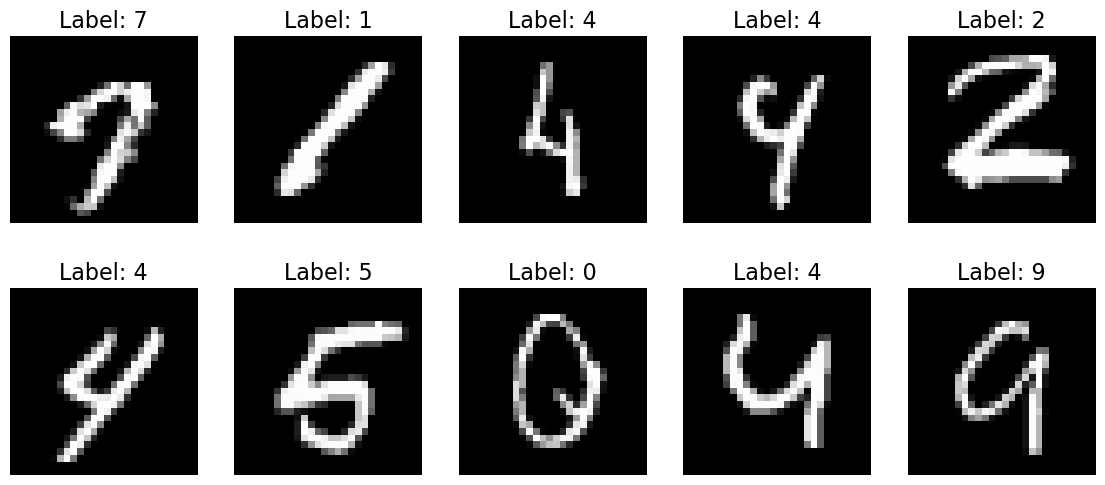

In [7]:
plot_images(train, cfg.path, dpi, dataset)

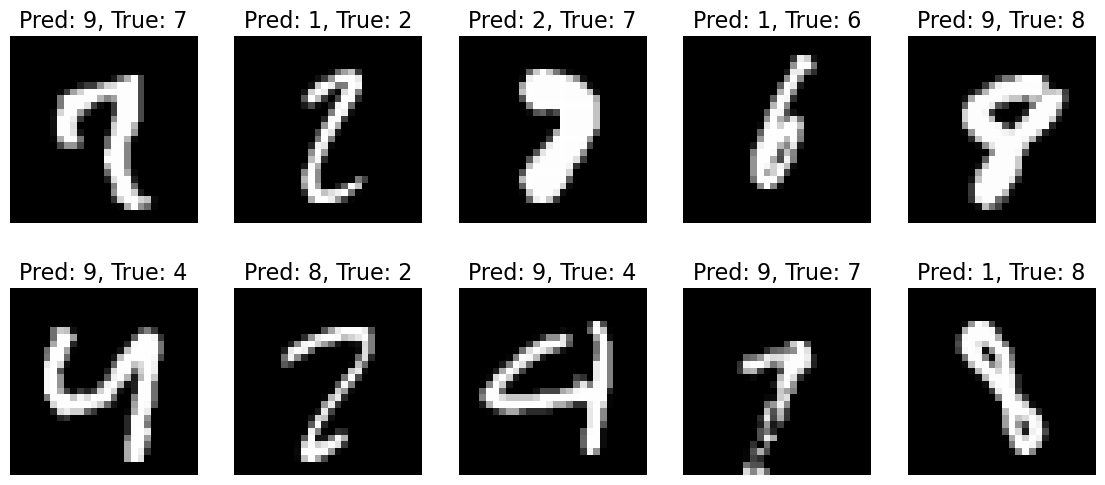

In [8]:
misclassified_images, misclassified_preds, true_labels = find_misclassified_images(cnn, test, device)
plot_misclassified_images(misclassified_images, misclassified_preds, true_labels, cfg.path, dpi, dataset)